# Исследование поведения пользователей в обновлённом приложении

ГИПОТЕЗА 1  

По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?  

ГИПОТЕЗА 2  

Кажется, повторное прохождение обучения положительно влияет на оплату, верно?

ГИПОТЕЗА 3  

Если пользователь сначала выбирает сложность, будет ли он потом проходить обучение?

ЗАДАЧИ:

1.Определить, насколько обучение сокращает время прохождения этапов игры.  
2.Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.  
3.Определить, насколько прозрачен процесс взаимодействия с игрой.



КОНКРЕТНЫЕ ШАГИ (ФОРМАЛИЗОВАННЫЕ ЗАДАЧИ)

1.Сравнить время прохождения различных этапов для пользователей, которые завершили обучение, и пользователей, не начинавших обучение. Если показатель отличается, выяснить, насколько.  
2.Проверить, существует ли зависимость между вероятностью оплаты вопросов и количеством обучений, которые начинал или завершал пользователь.  
3.Выяснить, как часто пользователи начинают обучение после выбора уровня сложности. (Это позволит оценить прозрачность процесса взаимодействия с игрой: если пользователи после выбора уровня сложности обращаются к обучению, значит, работа с приложением непонятна.)

----------------------------------------------------------------------

ИССЛЕДОВАНИЕ И ПРЕДОБРАБОТКА ДАННЫХ

In [1]:
# Импорт библиотеки pandas:
import pandas as pd

# Импортируем библиотеку matplotlib:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Считываю файлы CSV, создаю датафреймы
events_df = pd.read_csv ('C:/IDE/__pycache__/7_4_Events (1).csv')
purchase_df = pd.read_csv ('C:/IDE/__pycache__/7_4_Purchase (1).csv')

# проверяем данные ( типы данных, наличие пропусков)

events_df.info()
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252334 entries, 0 to 252333
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              252334 non-null  int64  
 1   event_type      252334 non-null  object 
 2   selected_level  31086 non-null   object 
 3   start_time      252334 non-null  object 
 4   tutorial_id     125103 non-null  float64
 5   user_id         252334 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 11.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5956 entries, 0 to 5955
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              5956 non-null   int64 
 1   user_id         5956 non-null   int64 
 2   event_datetime  5956 non-null   object
 3   amount          5956 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 186.2+ KB


Задание необходимо выполнять на основе данных пользователей, которые зарегистрировались в 2018 году (с 1 января по 31 декабря 2018 года включительно). 
 
Фильтруем данные

In [3]:
# фильтруем данные таблицы events_df по пользователями, которые зарегистрировались в период с 2018-01-01 по 2018-01-01
mask1 = events_df['start_time'] >= '2018-01-01'
mask2 = events_df['start_time'] < '2019-01-01'
mask3 = events_df['event_type'] == 'registration'

mask_2018 = events_df[mask1 & mask2 & mask3]['user_id'].to_list()
events_df = events_df[events_df['user_id'].isin(mask_2018)]

# Проверяем результ
events_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 66959 entries, 51405 to 118364
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              66959 non-null  int64  
 1   event_type      66959 non-null  object 
 2   selected_level  8342 non-null   object 
 3   start_time      66959 non-null  object 
 4   tutorial_id     32954 non-null  float64
 5   user_id         66959 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 3.6+ MB


In [4]:
# Проверяем период времени 
print(events_df['start_time'].min())
print(events_df['start_time'].max())

2018-01-01T03:48:40
2019-01-01T05:50:36


In [5]:
# Фильтруем данные таблицы  purchase_df по попользователям,которые зарегестрировались и совершали  в период с 2018-01-01 по 2018-01-01:
purchase_df = purchase_df[purchase_df['user_id'].isin(mask_2018)]

# Проверяем результа при помощи функции .info():
purchase_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1600 entries, 1171 to 2778
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              1600 non-null   int64 
 1   user_id         1600 non-null   int64 
 2   event_datetime  1600 non-null   object
 3   amount          1600 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 62.5+ KB


В обеих таблицах присутствуют одинаковые столбцы (id), но они имеют разноe значение.  
В датафрейме event_df столбце id указывает на id события, в purchase_df столбец id указывает на id оплаты.  

Переименовываем столбцы при помощи функции .rename()

In [6]:
events_df = events_df.rename(columns={'id': 'event_id'})

purchase_df = purchase_df.rename(columns={'id': 'purchase_id'})
purchase_df = purchase_df.rename(columns={'event_datetime': 'start_time'})
purchase_df['event_type'] = 'purchase'


Оъединяем таблицы

In [7]:
total_events = pd.concat([events_df, purchase_df], sort=False)


# Выводим результат объединения
total_events.head()

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
51405,80308.0,registration,NaN,2018-01-01T03:48:40,NaN,27832,NaN,NaN
51406,80309.0,registration,NaN,2018-01-01T04:07:25,NaN,27833,NaN,NaN
51407,80310.0,registration,NaN,2018-01-01T08:35:10,NaN,27834,NaN,NaN
51408,80311.0,registration,NaN,2018-01-01T11:54:47,NaN,27835,NaN,NaN
51409,80312.0,registration,NaN,2018-01-01T13:28:07,NaN,27836,NaN,NaN


In [8]:
# Переводим столбец event_date в правильный формат:
total_events.start_time = pd.to_datetime(total_events.start_time)

# Проверяем результат
total_events.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68559 entries, 51405 to 2778
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   event_id        66959 non-null  float64       
 1   event_type      68559 non-null  object        
 2   selected_level  8342 non-null   object        
 3   start_time      68559 non-null  datetime64[ns]
 4   tutorial_id     32954 non-null  float64       
 5   user_id         68559 non-null  int64         
 6   purchase_id     1600 non-null   float64       
 7   amount          1600 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(2)
memory usage: 4.7+ MB


In [9]:
# После соединения таблиц дублируются индексы:
total_events = total_events.reset_index(drop=True).sort_values('start_time')

# Выводим результат:
total_events

,event_id,event_type,selected_level,start_time,tutorial_id,user_id,purchase_id,amount
0,80308.0,registration,NaN,2018-01-01 03:48:40,NaN,27832,NaN,NaN
1,80309.0,registration,NaN,2018-01-01 04:07:25,NaN,27833,NaN,NaN
2,80310.0,registration,NaN,2018-01-01 08:35:10,NaN,27834,NaN,NaN
3,80311.0,registration,NaN,2018-01-01 11:54:47,NaN,27835,NaN,NaN
4,80312.0,registration,NaN,2018-01-01 13:28:07,NaN,27836,NaN,NaN
...,...,...,...,...,...,...,...,...
68554,NaN,purchase,NaN,2019-01-02 03:48:19,NaN,47498,18441.0,100.0
68555,NaN,purchase,NaN,2019-01-02 23:26:26,NaN,47647,18442.0,150.0
68556,NaN,purchase,NaN,2019-01-03 00:36:36,NaN,47554,18443.0,50.0
68557,NaN,purchase,NaN,2019-01-04 12:51:41,NaN,47742,18448.0,50.0


In [10]:
total_events[total_events["event_type"] == "registration"]["user_id"].value_counts().mean()

1.0

Разделим пользователей на группы:

In [11]:
# Все пользователи 
all_users_id = set(total_events['user_id'].unique())

# Пользователи, которые начали обучение
users_id_with_start_tutorial = set(total_events[total_events['event_type'] == 'tutorial_start']['user_id'].unique())

# пользователи, которые закончили обучение  
users_id_with_finish_tutorial = set(total_events[total_events["event_type"] == "tutorial_finish"]["user_id"].unique())

# пользователи, которые не начинали обучение
users_id_without_started_tutorial = all_users_id.difference(users_id_with_start_tutorial)


Данные для анализа подготовлены.

-------------------------------------------------------------------

ЗАДАЧА 1. Определить, насколько обучение сокращает время прохождения этапов игры.  

ГИПОТЕЗА 1. По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры?

In [12]:
# Создаем сводную таблицу pivot_events_df:
pivot_events_df = total_events.pivot_table(
    values='start_time', # Время события
    index='user_id', # user_id (id конкретного пользователя)
    columns='event_type', # Название событий 
    aggfunc='min' # функция aggfunc
)

# Делаем сброс индексов в сводной таблице:
pivot_events_df= pivot_events_df.reset_index()
pivot_events_df


event_type,user_id,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start
0,27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT
1,27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40
2,27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11
3,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51
4,27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40
...,...,...,...,...,...,...,...
19921,47753,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56
19922,47754,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT
19923,47755,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14
19924,47756,2019-01-01 05:42:11,2019-01-01 05:50:36,NaT,2018-12-31 23:17:30,2019-01-01 03:29:25,2019-01-01 03:26:18


In [13]:
# Создаем функцию get_tutorial_status которая распределит пользователей по группам Finished, Not started и Not finished:
def get_tutorial_status(user_id):
    if user_id in users_id_with_finish_tutorial:
        return 'Закончил'
    elif user_id in users_id_without_started_tutorial:
        return 'Не начинал'
    else:
        return 'Не закончил'

# Применяем функцию к столбцу user_id для создания нового столбца group с название группы:
pivot_events_df['group']=pivot_events_df['user_id'].apply(get_tutorial_status)
pivot_events_df

event_type,user_id,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,group
0,27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,Не начинал
1,27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,Закончил
2,27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,Закончил
3,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,Закончил
4,27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,Закончил
...,...,...,...,...,...,...,...,...
19921,47753,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56,Закончил
19922,47754,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT,Не начинал
19923,47755,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14,Закончил
19924,47756,2019-01-01 05:42:11,2019-01-01 05:50:36,NaT,2018-12-31 23:17:30,2019-01-01 03:29:25,2019-01-01 03:26:18,Закончил


In [14]:
#Создаем новые столбцы:

# показывает разницу во времени между purchase и registreation :
pivot_events_df['deltatime_reg_and_purchase'] = (pivot_events_df['purchase'] - pivot_events_df['registration']) / pd.Timedelta('1 hour')

# показывает разницу во времени между pack_choice и registration:
pivot_events_df['deltatime_reg_and_pack_choice'] = (pivot_events_df['pack_choice'] - pivot_events_df['registration']) / pd.Timedelta('1 hour')

# показывает разницу во времени между level_choice и registreation :
pivot_events_df['deltatime_reg_and_level_choice'] = (pivot_events_df['level_choice'] - pivot_events_df['registration']) / pd.Timedelta('1 hour')

display(pivot_events_df)

event_type,user_id,level_choice,pack_choice,purchase,registration,tutorial_finish,tutorial_start,group,deltatime_reg_and_purchase,deltatime_reg_and_pack_choice,deltatime_reg_and_level_choice
0,27832,NaT,NaT,NaT,2018-01-01 03:48:40,NaT,NaT,Не начинал,NaN,NaN,NaN
1,27833,NaT,NaT,NaT,2018-01-01 04:07:25,2018-01-01 17:50:08,2018-01-01 17:47:40,Закончил,NaN,NaN,NaN
2,27834,NaT,NaT,NaT,2018-01-01 08:35:10,2018-01-01 19:48:01,2018-01-01 19:46:11,Закончил,NaN,NaN,NaN
3,27835,2018-01-01 20:37:22,2018-01-01 20:38:43,NaT,2018-01-01 11:54:47,2018-01-01 15:06:15,2018-01-01 15:00:51,Закончил,NaN,8.732222,8.709722
4,27836,NaT,NaT,NaT,2018-01-01 13:28:07,2018-01-01 15:42:58,2018-01-01 14:54:40,Закончил,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
19921,47753,2018-12-31 22:36:19,2018-12-31 22:38:05,NaT,2018-12-31 18:58:55,2018-12-31 20:57:07,2018-12-31 20:54:56,Закончил,NaN,3.652778,3.623333
19922,47754,NaT,NaT,NaT,2018-12-31 19:14:08,NaT,NaT,Не начинал,NaN,NaN,NaN
19923,47755,2019-01-01 05:04:52,NaT,NaT,2018-12-31 21:15:14,2019-01-01 00:09:30,2019-01-01 00:08:14,Закончил,NaN,NaN,7.827222
19924,47756,2019-01-01 05:42:11,2019-01-01 05:50:36,NaT,2018-12-31 23:17:30,2019-01-01 03:29:25,2019-01-01 03:26:18,Закончил,NaN,6.551667,6.411389


Группировка данных по среднему времени

In [15]:
#  между регистрацией и покупкой по группе пользователей:
grouped_deltatime_reg_and_purchase = round(pivot_events_df.groupby('group', as_index=False)[['deltatime_reg_and_purchase']].mean(),2)

#  между регистрацией и выбором пакета вопросов по группе пользователей:
grouped_deltatime_reg_and_pack_choice = round(pivot_events_df.groupby('group', as_index=False)[['deltatime_reg_and_pack_choice']].mean(),2)

#  между регистрацией и выбором уровня сложности по группе пользователей:
grouped_deltatime_reg_and_level_choice = round(pivot_events_df.groupby('group', as_index=False)[['deltatime_reg_and_level_choice']].mean(),2)

Строим столбчатые диаграммы по группам пользователей

Диаграмма 1 - показывает среднюю разницу во времени между регистрацией и покупкой

[Text(0, 0, '96.5'), Text(0, 0, '101.55'), Text(0, 0, '105.1')]

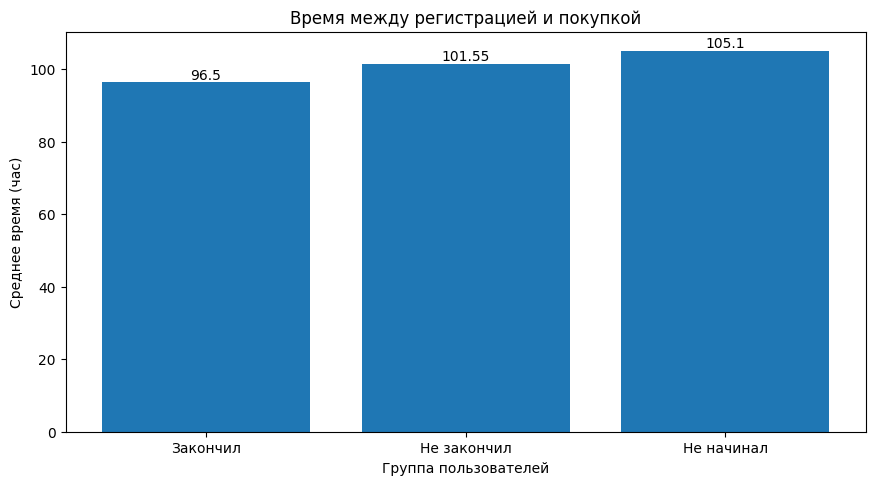

In [16]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0,0,1,1])
bar_group_1 = axes.bar(
    x =  grouped_deltatime_reg_and_purchase['group'],
    height = grouped_deltatime_reg_and_purchase['deltatime_reg_and_purchase'])
axes.set_title('Время между регистрацией и покупкой')
axes.set_ylabel('Среднее время (час)')
axes.set_xlabel('Группа пользователей')
axes.bar_label(bar_group_1)


Диаграмма 2 - показывает среднюю разницу во времени между регистрацией и выбором пакета вопросов

[Text(0, 0, '7.18'), Text(0, 0, '8.38'), Text(0, 0, '5.12')]

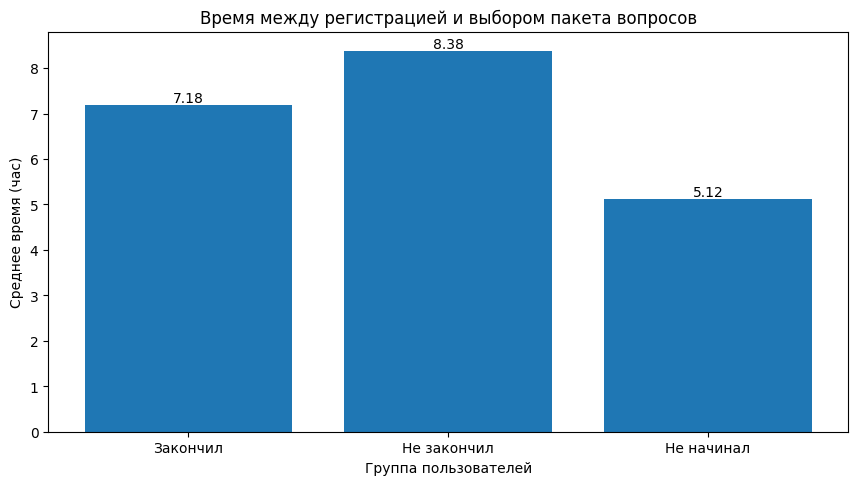

In [17]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0,0,1,1])
bar_group_2 = axes.bar(
    x =  grouped_deltatime_reg_and_pack_choice['group'],
    height = grouped_deltatime_reg_and_pack_choice['deltatime_reg_and_pack_choice'])
axes.set_title('Время между регистрацией и выбором пакета вопросов')
axes.set_ylabel('Среднее время (час)')
axes.set_xlabel('Группа пользователей')
axes.bar_label(bar_group_2)

Диаграмма 3 - показывает среднюю разницу во времени между регистрацией и выбором уровня сложности 

[Text(0, 0, '7.09'), Text(0, 0, '8.22'), Text(0, 0, '5.26')]

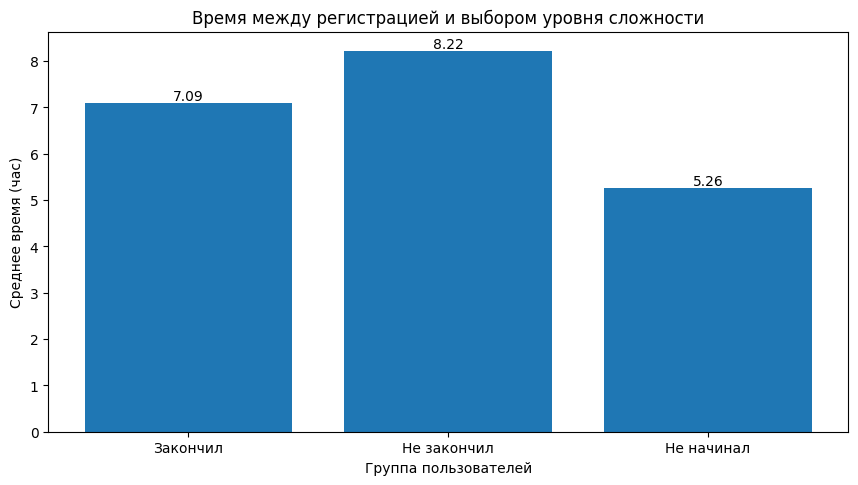

In [18]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0,0,1,1])
bar_group_3 = axes.bar(
    x =  grouped_deltatime_reg_and_level_choice['group'],
    height = grouped_deltatime_reg_and_level_choice['deltatime_reg_and_level_choice'])
axes.set_title('Время между регистрацией и выбором уровня сложности')
axes.set_ylabel('Среднее время (час)')
axes.set_xlabel('Группа пользователей')
axes.bar_label(bar_group_3)

ВЫВОДЫ:  

Диаграмма 1 показывает, что пользователи, которые прошли обучение и закончили его в среднем  тратят меньше  времени между регистрацией и покупкой

Диаграмма 2  показывает, что пользователи, которые не начинали обучение тратят меньше времени между регистрацией и выбором пакета вопросов 

Диаграмма 3 показывает, что пользователи, которые не проходили обучение в среднем тратят меньше времени от регистрации до выбора уровня сложности.   



ОТВЕТ НА ГИПОТЕЗУ 1 ( По идее, должна быть разница в поведении групп, которые проходят и не проходят обучение. Но так ли это? Влияет ли обучение на скорость прохождения других этапов игры? )

Разница в поведении групп, которые проходят и не проходят обучение, видна. Пользователи, которые прошли обучение, тратят меньше времени между регистрацией и покупкой,а также между выбором покета вопросов и уровнем сложности. Соответственно  обучение влияет на скорость прохождения других этапов игры.


--------------------------------------------------------------

ЗАДАЧА 2. Доказать, что успешное обучение само по себе влияет на оплату и не имеет значения то, каким этапом оно шло.  

ГИПОТЕЗА 2.  Кажется, повторное прохождение обучения положительно влияет на оплату, верно?

Подготавливаем данные

Строим сводную таблицу,которая  отобразит  все типы событий у каждого пользователя.

In [19]:
pivot_events_df2 = total_events.pivot_table(
    values='start_time', # Время события
    index='user_id', # user_id (id конкретного пользователя)
    columns='event_type', # Название событий 
    aggfunc='count' # функция aggfunc
)


In [20]:
# Группируем пользователей, которые начинали обучение, по фактам регистрации и оплаты
group_2 = pivot_events_df2.groupby(['tutorial_start'])[['registration', 'purchase']].sum()
group_2 = pd.DataFrame(group_2).reset_index().sort_values(by='tutorial_start', ascending= True)


group_2

event_type,tutorial_start,registration,purchase
0,1.0,9103.0,1207.0
1,2.0,1589.0,218.0
2,3.0,427.0,51.0
3,4.0,221.0,30.0
4,5.0,109.0,16.0
5,6.0,116.0,14.0
6,7.0,94.0,12.0
7,8.0,86.0,13.0
8,9.0,113.0,17.0


In [21]:
# Посчитаем CR каждой группы
group_2['CR'] = round(group_2['purchase']/group_2['registration']*100, 1)
display(group_2)

event_type,tutorial_start,registration,purchase,CR
0,1.0,9103.0,1207.0,13.3
1,2.0,1589.0,218.0,13.7
2,3.0,427.0,51.0,11.9
3,4.0,221.0,30.0,13.6
4,5.0,109.0,16.0,14.7
5,6.0,116.0,14.0,12.1
6,7.0,94.0,12.0,12.8
7,8.0,86.0,13.0,15.1
8,9.0,113.0,17.0,15.0


Диаграмма 1 - отображает показатель конверсии и кол-во обучений

In [22]:

import plotly.express as px
fig2 =px.bar(
    group_2,
    x= 'tutorial_start',
    y= 'CR',
    orientation= 'v'
)
fig2.show()

In [23]:
#Группируем по  группам пользователей и считаем кол-во продаж:
purchase_by_group = pivot_events_df.groupby('group', as_index=False)[['purchase']].count()
purchase_by_group

event_type,group,purchase
0,Закончил,1447
1,Не закончил,131
2,Не начинал,22


Диаграмма 2 -  показывает кол-во покупок по группам пользователей

[Text(0, 0, '1447'), Text(0, 0, '131'), Text(0, 0, '22')]

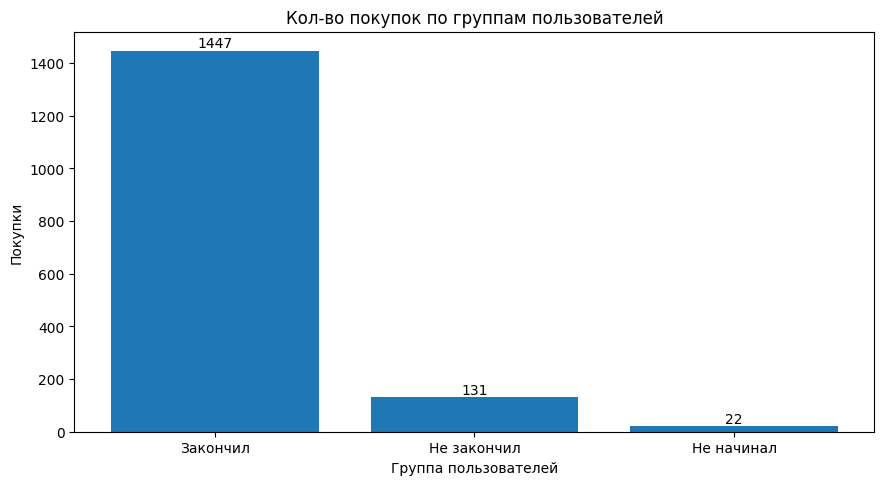

In [24]:

fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0,0,1,1])
group = axes.bar(
    x =  purchase_by_group['group'],
    height = purchase_by_group['purchase'])
axes.set_title('Кол-во покупок по группам пользователей')
axes.set_ylabel('Покупки')
axes.set_xlabel('Группа пользователей')
axes.bar_label(group)

Диаграмма 3  -  показывает долю оплат по группам пользователей

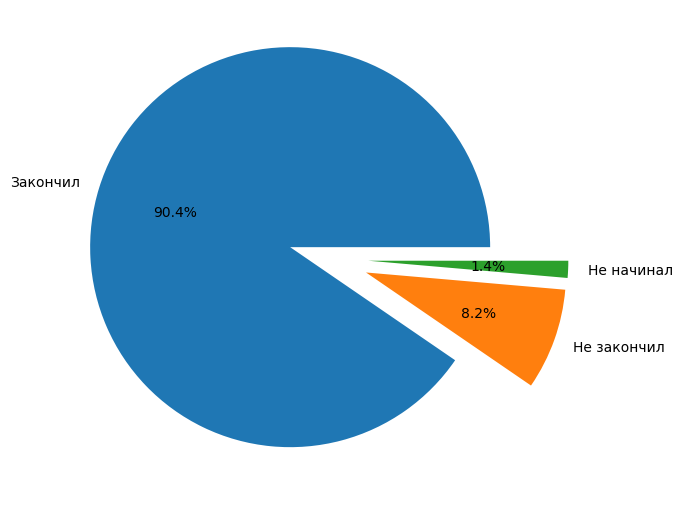

In [30]:
fig = plt.figure(figsize=(5,5))
axes = fig.add_axes([0,0,1,1])

axes.pie(
    purchase_by_group['purchase'],
    labels=purchase_by_group['group'],
    autopct='%.1f%%',
    explode = [0.2,0.2,0.2]
)
plt.show()

ВЫВОДЫ:  
Диаграмма 1 показывает, что разница в показателях конверсии (CR) между группами пользователей незначительная, следовательно можно утверждать, что нет прямой зависимости между колличеством обучений и вероятностью оплаты вопросов. 

Диаграмма 2 показывает, что большую часть покупок совершили пользователи, которые закончили  обучение.  

Диаграмма 3 показывает, что 90 % оплат совершили также  пользователи, которые закончили обучение.

ОТВЕТ НА ГИПОТЕЗУ 2.(Кажется, повторное прохождение обучения положительно влияет на оплату, верно?)  
Повторное прохождение обучения положительно влияет на оплату. 

---------------------------------------------------------------------------------------------------------

ЗАДАЧА 3. Определить, насколько прозрачен процесс взаимодействия с игрой.

ГИПОТЕЗА 3. Если пользователь сначала выбирает сложность, будет ли он потом проходить обучение?

In [26]:
# Создаем датафрейм с пользователями, которые начали обучение (tutorial_start)
tutorial_start_group = total_events[total_events['event_type']== 'tutorial_start']

# Создаем датафрейм с пользователями, которые выбрали уровень сложности(level_choice)
level_choice_group = total_events[total_events['event_type']== 'level_choice']

# Переименуем столбец start_time
level_choice_group = level_choice_group.rename(columns={'start_time': 'level_choice_time'})

# Объединяем таблицы
delta_tutorial_start_level_choice= tutorial_start_group[['user_id', 'start_time']].merge(
    level_choice_group[['user_id', 'level_choice_time']],
    on= 'user_id',
    how= 'inner'
)
## Создаем дополнительный столбце delta_time которая покызывает разницу во времени
delta_tutorial_start_level_choice['delta_time'] = (delta_tutorial_start_level_choice['start_time'] - delta_tutorial_start_level_choice['level_choice_time'])

delta_tutorial_start_level_choice.info()
display(delta_tutorial_start_level_choice)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12686 entries, 0 to 12685
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype          
---  ------             --------------  -----          
 0   user_id            12686 non-null  int64          
 1   start_time         12686 non-null  datetime64[ns] 
 2   level_choice_time  12686 non-null  datetime64[ns] 
 3   delta_time         12686 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(1), timedelta64[ns](1)
memory usage: 396.6 KB


,user_id,start_time,level_choice_time,delta_time
0,27835,2018-01-01 15:00:51,2018-01-01 20:37:22,-1 days +18:23:29
1,27839,2018-01-01 19:11:36,2018-01-01 22:37:50,-1 days +20:33:46
2,27840,2018-01-02 02:07:07,2018-01-02 05:18:42,-1 days +20:48:25
3,27845,2018-01-02 03:03:44,2018-01-02 06:19:18,-1 days +20:44:26
4,27845,2018-01-02 07:08:00,2018-01-02 06:19:18,0 days 00:48:42
...,...,...,...,...
12681,47732,2018-12-31 07:14:38,2018-12-31 09:59:00,-1 days +21:15:38
12682,47747,2018-12-31 10:21:11,2018-12-31 12:24:40,-1 days +21:56:31
12683,47753,2018-12-31 20:54:56,2018-12-31 22:36:19,-1 days +22:18:37
12684,47755,2019-01-01 00:08:14,2019-01-01 05:04:52,-1 days +19:03:22


Рассчитываем пользователей, которые приступили к обучению после выбора уровня сложности

In [27]:

users_level_choice_before_tutorial = delta_tutorial_start_level_choice.query('delta_time > "1 second"')['user_id'].nunique()
print('Количество пользователей, приступивших к обучению после выбора уровня сложности:', users_level_choice_before_tutorial)

Количество пользователей, приступивших к обучению после выбора уровня сложности: 1386


Рассчитываем пользователей, которые приступили к  выбору уровня сложности после начала обучения

In [28]:
users_level_choice_after_tutorial = delta_tutorial_start_level_choice.query('delta_time < @pd.Timedelta(0)')['user_id'].nunique() 
print('Количество пользователей, приступивших к выбору уровня сложности после начала обучения:',users_level_choice_after_tutorial)  

Количество пользователей, приступивших к выбору уровня сложности после начала обучения: 8244


Находим долю пользователей, которые начали обучение после выбора уровня сложности :

In [29]:
users = users_level_choice_before_tutorial /users_level_choice_after_tutorial
print('Доля пользователей, которые начали обучение после выбора уровня сложности: {:.2%}'.format(users))

Доля пользователей, которые начали обучение после выбора уровня сложности: 16.81%


ВЫВОД:  
В результате расчетов видим, что почти 17% пользователей начинают обучение после выбора уровня сложноти, это говорит о том, что этим пользователям  не понятна работа с приложением.